Workflow analyse data from human gut community cultured in vitro (metabolomics and metagenomics)


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

%matplotlib inline
#%matplotlib qt

In [33]:
# define data folder
metabolomics_data_folder = '..\\ProcessedData\\output\\'

In [3]:
# define figure folder
figure_folder = '..\\Figures\\'

Read shortbred data for different community samples

In [4]:
# get folder for shortBRED results
shortbredFolder = '..\\InputData\\merged_results_stool_shortBRED\\'
onlyfiles = [f for f in listdir(shortbredFolder) if isfile(join(shortbredFolder, f))]

In [31]:
# read all shortbred files in separate dataframes
# array of dataframes 
shortbred_df_joint = []
# keep all enzye names
shortbred_enzymes = []
for myfile in onlyfiles:
    mydata_shortbred = pd.read_csv(shortbredFolder + '\\' + myfile,
                    sep='\t', index_col=0) 
    shortbred_df_joint.append(mydata_shortbred)
    shortbred_enzymes.extend(mydata_shortbred.index.to_list())
    print('Unique enzymes in ', myfile, len(set(mydata_shortbred.index.to_list())))

Unique enzymes in  C00031_enzymes.txt 262
Unique enzymes in  C00095_enzymes.txt 263
Unique enzymes in  C00124_enzymes.txt 142
Unique enzymes in  C00137_enzymes.txt 180
Unique enzymes in  C00221_enzymes.txt 180
Unique enzymes in  C00245_enzymes.txt 198
Unique enzymes in  C00785_enzymes.txt 206
Unique enzymes in  C00931_enzymes.txt 206
Unique enzymes in  C03238_enzymes.txt 209
Unique enzymes in  C18796_enzymes.txt 209


In [29]:
print('Unique enzymes in the lists: ', len(set(shortbred_enzymes)))

Unique enzymes in the lists:  263


In [32]:
set(shortbred_enzymes).difference(shortbred_df_joint[1].index.to_list())

set()

In [42]:
# keep first element as main table
shortbred_df = shortbred_df_joint[1].copy()

All enzymes are in C00095 file

Sequencing data was downloaded from https://www.ebi.ac.uk/ena/browser/view/PRJEB31790
Downloaded information about sample files to match IDs.

In [40]:
# read information about sequencing data files
shortbred_info = pd.read_csv('..\\InputData\\' + 'filereport_read_run_PRJEB31790_tsv.txt',
                               sep='\t')

In [41]:
shortbred_info

,study_accession,sample_accession,experiment_accession,run_accession,tax_id,scientific_name,fastq_ftp,submitted_ftp,sra_ftp,bam_ftp
0,PRJEB31790,SAMEA5537482,ERX3288428,ERR3261720,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/000/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261720/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/000/ERR3261720,NaN
1,PRJEB31790,SAMEA5537489,ERX3288435,ERR3261727,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/007/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261727/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/007/ERR3261727,NaN
2,PRJEB31790,SAMEA5537495,ERX3288441,ERR3261733,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/003/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261733/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/003/ERR3261733,NaN
3,PRJEB31790,SAMEA5537498,ERX3288444,ERR3261736,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/006/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261736/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/006/ERR3261736,NaN
4,PRJEB31790,SAMEA5537500,ERX3288446,ERR3261738,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/008/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261738/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/008/ERR3261738,NaN
5,PRJEB31790,SAMEA5537505,ERX3288451,ERR3261743,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/003/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261743/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/003/ERR3261743,NaN
6,PRJEB31790,SAMEA5537483,ERX3288429,ERR3261721,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/001/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261721/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/001/ERR3261721,NaN
7,PRJEB31790,SAMEA5537484,ERX3288430,ERR3261722,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/002/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261722/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/002/ERR3261722,NaN
8,PRJEB31790,SAMEA5537486,ERX3288432,ERR3261724,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/004/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261724/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/004/ERR3261724,NaN
9,PRJEB31790,SAMEA5537488,ERX3288434,ERR3261726,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/006/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261726/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/006/ERR3261726,NaN


In [43]:
# check if run_accession corresponds to the columns in shortbred table
set(shortbred_info.run_accession).difference(shortbred_df.columns)

set()

In [50]:
# get community ID from submitted file names and save them as dataframe column
shortbred_info.loc[:,"community_id"] = [x.split('/')[-1][0:4] for x in shortbred_info.submitted_ftp]

In [57]:
# rename columns in shortbred_df according to the information in shortbred_info
# make a dictionary of id conversion
id_dict = dict(map(lambda i,j : (i,j) , shortbred_info.run_accession, shortbred_info.community_id))
new_columns = [id_dict[x] for x in shortbred_df.columns]
shortbred_df.columns = new_columns

In [58]:
shortbred_df

,MV01,MV02,MV03,MV04,MV05,MV06,MV07,MV08,MV09,MV10,...,MV19,MV20,MV21,MV22,MV23,MV24,MV25,MV26,MV27,MV28
BACSTE_RS04065,13.210180,0.000000,0.000000,35.977323,0.0,56.516237,38.323906,30.415072,22.322748,0.000000,...,0.0,3.225782,1.234909,37.237263,0.000000,0.000000,3.178691,0.000000,4.218022,45.885391
BACSTE_RS07110,0.000000,0.000000,0.000000,36.532329,0.0,57.342776,0.000000,29.482077,0.000000,0.000000,...,0.0,0.000000,0.000000,22.781764,0.000000,0.000000,5.322459,0.000000,3.003721,0.000000
BACSTE_RS10565,18.014142,0.000000,1.338641,46.860496,0.0,83.001400,68.280617,45.816331,43.966647,0.000000,...,0.0,4.550412,1.551536,59.128451,0.000000,0.000000,4.056693,0.000000,7.270025,67.420119
BACSTE_RS11790,15.359224,0.000000,0.000000,49.602236,0.0,72.776047,55.138391,37.973114,34.128286,0.000000,...,0.0,5.759990,1.952888,58.220063,0.000000,0.000000,5.948631,0.000000,4.755891,70.889107
BACSTE_RS13760,13.869352,0.000000,0.000000,38.062827,0.0,61.285092,44.182789,27.003103,29.325046,0.816020,...,0.0,4.336934,1.543023,43.032220,0.000000,0.000000,5.155480,0.000000,5.707069,56.762655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RUMTOR_RS04855,0.000000,0.101015,0.000000,0.779813,0.0,0.151135,0.015108,0.239732,0.067331,2.499374,...,0.0,0.000000,0.000000,0.337091,0.098537,0.050968,0.000000,0.051550,0.281483,2.277398
RUMTOR_RS05040,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.050217,0.000000,0.000000,23.851520,...,0.0,0.000000,0.000000,0.540069,0.245636,0.000000,0.000000,1.459571,0.000000,5.607774
RUMTOR_RS06925,0.000000,0.151522,0.060104,0.194953,0.0,0.201513,0.000000,0.059933,0.067331,3.586059,...,0.0,0.000000,0.051371,0.056182,0.197074,0.050968,0.000000,0.670152,0.140742,1.841300
RUMTOR_RS09440,0.000000,0.000000,0.100090,0.327591,0.0,0.086929,0.012580,0.099806,0.172244,9.327993,...,0.0,0.000000,0.220057,0.140339,0.621286,0.000000,0.000000,1.754189,0.117188,2.170455


Read metabolomics data from the communities

In [37]:
metabolomics_data = pd.read_csv(metabolomics_data_folder + 'table_candidate_sub_prod_pair_metabolites_in_communities.csv',
                               sep=',',
                               encoding='unicode_escape')

In [38]:
metabolomics_data

,MZ,RT,CompoundID,CompoundName,Matched_MZ,Matched_RT,CTR01A_0,CTR01A_1,CTR01A_2,CTR01A_4,...,MV28C_24,MV28D_0,MV28D_1,MV28D_2,MV28D_4,MV28D_6,MV28D_8,MV28D_12,MV28D_18,MV28D_24
0,102.032,0.442,cpd:C00109;cpd:C00164;cpd:C00232;cpd:C00349;cp...,2-Oxobutanoate; 2-Ketobutyric acid; 2-Oxobutyr...,102.03360,0.433667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102.032,0.442,cpd:C00109;cpd:C00164;cpd:C00232;cpd:C00349;cp...,2-Oxobutanoate; 2-Ketobutyric acid; 2-Oxobutyr...,102.03000,1.562667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118.027,0.923,cpd:C00042;cpd:C02170;cpd:C10900;cpd:C21761;ak...,Succinate; Succinic acid; Butanedionic acid; E...,118.02780,0.479000,NaN,NaN,NaN,NaN,...,NaN,480432.589418,NaN,317207.164275,260411.191493,245909.953406,NaN,NaN,NaN,NaN
3,118.027,0.923,cpd:C00042;cpd:C02170;cpd:C10900;cpd:C21761;ak...,Succinate; Succinic acid; Butanedionic acid; E...,118.02900,4.042000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,181.074,0.840,cpd:C00082;cpd:C01536;cpd:C03290;cpd:C04368;cp...,L-Tyrosine; (S)-3-(p-Hydroxyphenyl)alanine; (S...,181.07385,0.770273,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,244.089,2.328,cpd:C00120;cpd:C20818;btn;HMDB0000030;HMDB0014...,Biotin; D-Biotin; Vitamin H; Coenzyme R;C20818...,244.08820,1.055000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271872.623648,NaN,NaN
93,244.089,2.328,cpd:C00120;cpd:C20818;btn;HMDB0000030;HMDB0014...,Biotin; D-Biotin; Vitamin H; Coenzyme R;C20818...,244.08810,1.973000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,261.122,6.830,cpd:C08332;cpd:C08334;cpd:C10607;HMDB0013133;H...,Heterodendrin;Lotaustralin;Mycosporine;Methylm...,261.12310,0.448600,683685.621178,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,309.106,6.230,cpd:C00270;cpd:C03525;cpd:C19909;cpd:C19910;cp...,N-Acetylneuraminate; N-Acetylneuraminic acid; ...,309.10660,0.417143,305030.803537,NaN,249611.804409,249382.856151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# get columns of metabolomics data
met_mv_columns = [x for x in metabolomics_data.columns.to_list() if x.find('MV')==0]
# get time of metabolomics columns
met_mv_time = [int(x.split('_')[-1]) for x in met_mv_columns]
# get community id
met_mv_id = [x.split('_')[0][0:4] for x in met_mv_columns]

In [93]:
met_mv_time_unique

[0, 1, 2, 4, 6, 8, 12, 18, 24]

In [92]:
met_mv_time_unique = list(set(met_mv_time))
met_mv_id_unique = list(set(met_mv_id))

In [117]:
# add columns about metabolite IDs
info_columns = metabolomics_data.columns[0:6]

In [118]:
# add columns about metabolite IDs
info_columns

Index(['MZ', 'RT', 'CompoundID', 'CompoundName', 'Matched_MZ', 'Matched_RT'], dtype='object')

In [131]:
# create dataframe with means per sample per time
met_mean_df = []
for curtime in met_mv_time_unique:
    curdf = metabolomics_data[info_columns].copy()
    for curid in met_mv_id_unique:
        addcolumn = metabolomics_data[[met_mv_columns[i] for i in range(len(met_mv_time)) 
                                     if (met_mv_time[i] == curtime) and (met_mv_id[i] == curid)]]
        curdf.loc[:, curid] =  addcolumn.mean(axis=1)
    met_mean_df.append(curdf)
    

In [134]:
# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(curdf)

         MZ      RT                                         CompoundID  \
0   102.032   0.442  cpd:C00109;cpd:C00164;cpd:C00232;cpd:C00349;cp...   
1   102.032   0.442  cpd:C00109;cpd:C00164;cpd:C00232;cpd:C00349;cp...   
2   118.027   0.923  cpd:C00042;cpd:C02170;cpd:C10900;cpd:C21761;ak...   
3   118.027   0.923  cpd:C00042;cpd:C02170;cpd:C10900;cpd:C21761;ak...   
4   181.074   0.840  cpd:C00082;cpd:C01536;cpd:C03290;cpd:C04368;cp...   
5   192.063   0.502  cpd:C00296;cpd:C01295;cpd:C12113;cpd:C17691;cp...   
6   214.132   1.213  cpd:C01909;dtbt;HMDB0003581;HMDB0029030;HMDB00...   
7   214.132   1.213  cpd:C01909;dtbt;HMDB0003581;HMDB0029030;HMDB00...   
8   214.132   1.213  cpd:C01909;dtbt;HMDB0003581;HMDB0029030;HMDB00...   
9   226.095   1.329          cpd:C00931;ppbng;HMDB0000245;HMDB0014336;   
10  226.095   1.329          cpd:C00931;ppbng;HMDB0000245;HMDB0014336;   
11  226.095   1.329          cpd:C00931;ppbng;HMDB0000245;HMDB0014336;   
12  232.106   0.794  cpd:C01410;cpd:C0

In [233]:
time_idx = 1
met_idx = 9 # 14 #9
enzyme_idx = 'BW25113_RS01905'

In [234]:
shortbred_df.index

Index(['BACSTE_RS04065', 'BACSTE_RS07110', 'BACSTE_RS10565', 'BACSTE_RS11790',
       'BACSTE_RS13760', 'BACSTE_RS15125', 'BACSTE_RS15140', 'BACSTE_RS15810',
       'BACSTE_RS15815', 'BACSTE_RS15855',
       ...
       'RUMOBE_RS11190', 'RUMOBE_RS14785', 'RUMOBE_RS16070', 'RUMTOR_RS04810',
       'RUMTOR_RS04820', 'RUMTOR_RS04855', 'RUMTOR_RS05040', 'RUMTOR_RS06925',
       'RUMTOR_RS09440', 'RUMTOR_RS10790'],
      dtype='object', length=263)

In [235]:
curdf = met_mean_df[time_idx]
x = np.asarray(shortbred_df.loc[enzyme_idx, met_mv_id_unique])
y = np.asarray(curdf.loc[met_idx, met_mv_id_unique])

In [236]:
x = [x[i] for i in range(len(y)) if np.isnan(y[i])==False]
y = [y[i] for i in range(len(y)) if np.isnan(y[i])==False]

In [239]:
[test1, test2 ] = np.corrcoef(x,y)

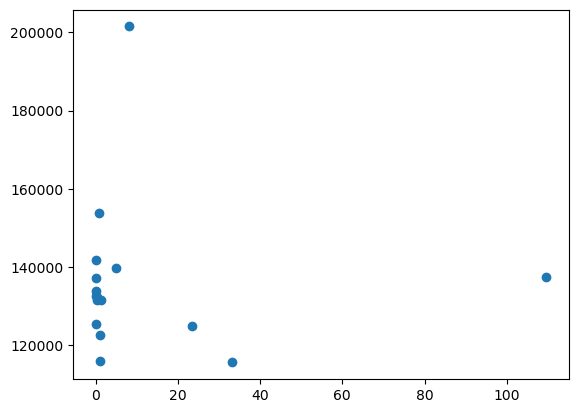

In [215]:
plt.scatter(x,y)